In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os, shutil
import cv2
import random
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import layers, models

In [4]:
df=pd.read_csv("../data/pokedex.csv")

In [5]:
df.fillna(0,inplace=True)

In [6]:
df["Description"] = (
    "Name: " +
    df['Name'].astype(str) + ", " + 
    "Type 1: "+
    df["Type 1"].astype(str) + ", " + 
    "Type 2: "+
    df["Type 2"].astype(str) + ", " +
    "Total: "+
    df["Total"].astype(str) + ", " + 
    "HP: "+
    df["HP"].astype(str) + ", " + 
    "Attack: "+
    df["Attack"].astype(str) + ", " + 
    "Defense: "+
    df["Defense"].astype(str) + ", " + 
    "Special Attack: "+
    df["SP. Atk."].astype(str) + ", " + 
    "Special Defence: "+
    df["SP. Def"].astype(str) + ", " + 
    "Speed: "+
    df["Speed"].astype(str)
)

In [7]:
df.drop(["Index","Name","Type 1","Type 2","Total","HP","Attack","Defense","SP. Atk.","SP. Def","Speed"],axis=1,inplace=True)

In [33]:
df

Image                                        Description
0        images/1.png  Name: Bulbasaur, Type 1: Grass, Type 2: Poison...
1        images/2.png  Name: Ivysaur, Type 1: Grass, Type 2: Poison, ...
2        images/3.png  Name: Venusaur, Type 1: Grass, Type 2: Poison,...
3        images/4.png  Name: Venusaur Mega Venusaur, Type 1: Grass, T...
4        images/5.png  Name: Charmander, Type 1: Fire, Type 2: 0, Tot...
...               ...                                                ...
1210  images/1211.png  Name: Iron Crown, Type 1: Steel, Type 2: Psych...
1211  images/1212.png  Name: Terapagos Normal Form, Type 1: Normal, T...
1212  images/1213.png  Name: Terapagos Terastal Form, Type 1: Normal,...
1213  images/1214.png  Name: Terapagos Stellar Form, Type 1: Normal, ...
1214  images/1215.png  Name: Pecharunt, Type 1: Poison, Type 2: Ghost...

[1215 rows x 2 columns]

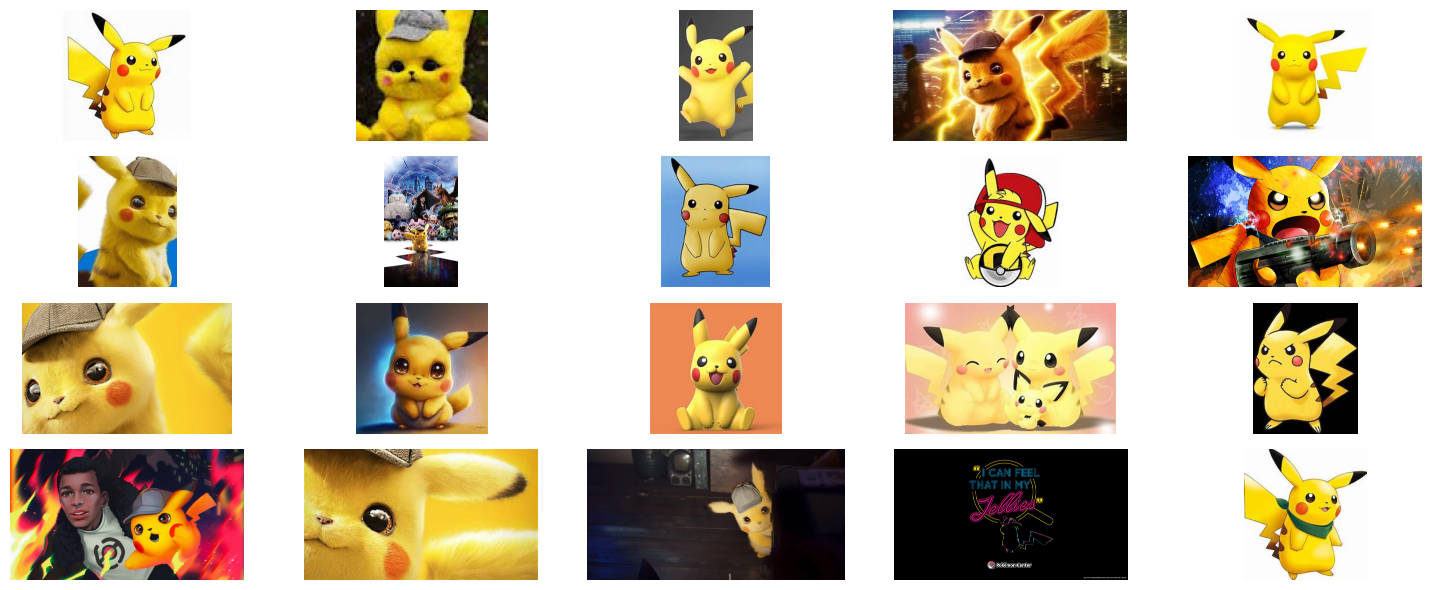

In [7]:
image_dir = "../data/train/Pikachu - Yahoo Image Search Results/"

# List all files in the directory and select 10 random images
image_files = random.sample(os.listdir(image_dir), 20)

# Load and display the images in a 2x5 grid
fig, axes = plt.subplots(4, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    # Open each image file
    img = Image.open(os.path.join(image_dir, image_files[i]))
    ax.imshow(img)
    ax.axis('off')  # Hide axes for clarity

plt.tight_layout()
plt.show()

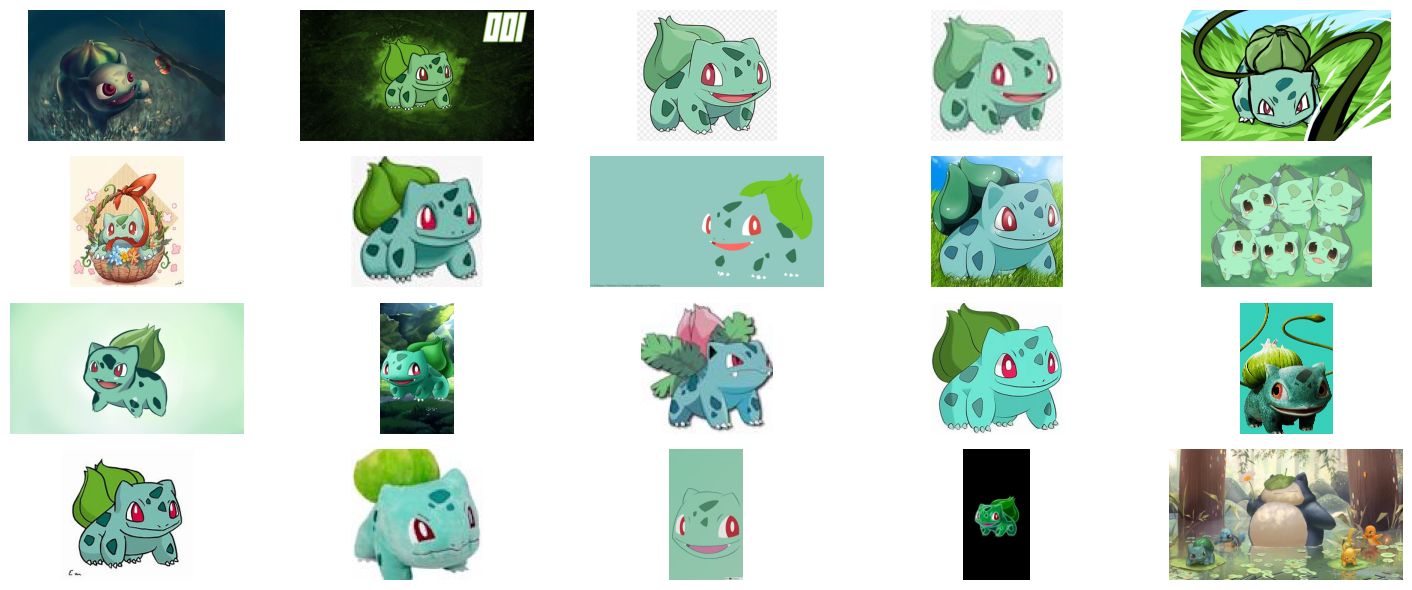

In [8]:
image_dir = "../data/train/bulbasaur pokemon - Yahoo Image Search Results/"

# List all files in the directory and select 10 random images
image_files = random.sample(os.listdir(image_dir), 20)

# Load and display the images in a 2x5 grid
fig, axes = plt.subplots(4, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    # Open each image file
    img = Image.open(os.path.join(image_dir, image_files[i]))
    ax.imshow(img)
    ax.axis('off')  # Hide axes for clarity

plt.tight_layout()
plt.show()

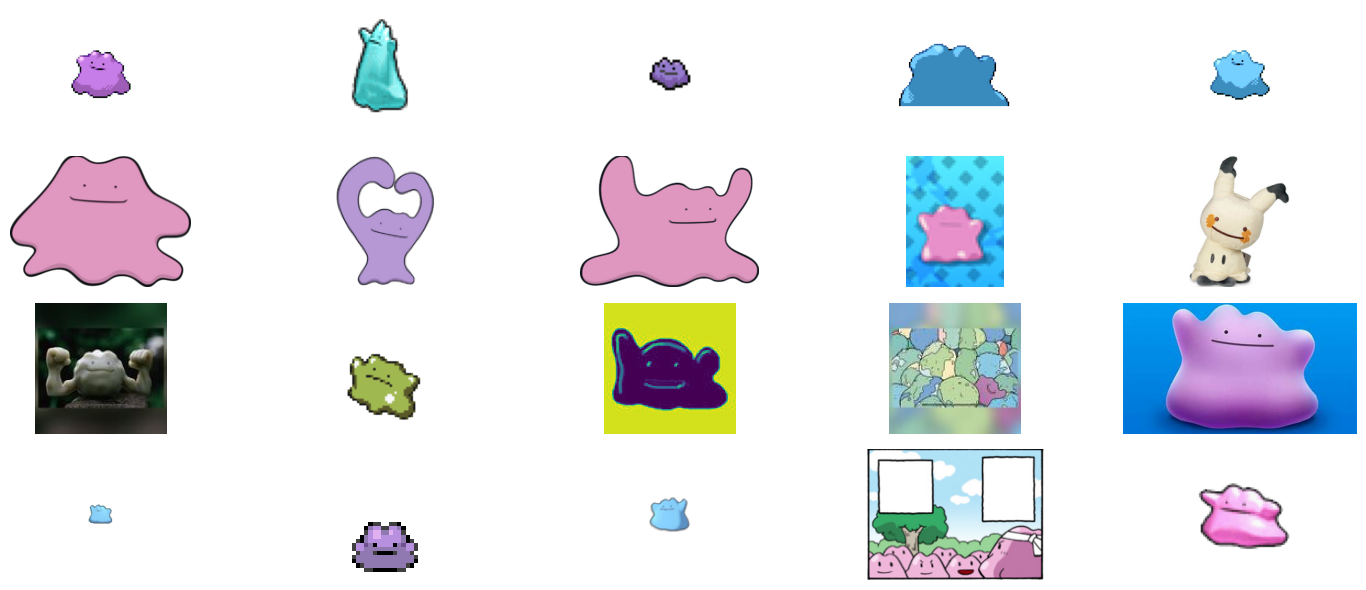

In [ ]:
image_dir = "../data/train/ditto pokemon - Yahoo Image Search Results/"

# List all files in the directory and select 10 random images
image_files = random.sample(os.listdir(image_dir), 20)

# Load and display the images in a 2x5 grid
fig, axes = plt.subplots(4, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    # Open each image file
    img = Image.open(os.path.join(image_dir, image_files[i]))
    ax.imshow(img)
    ax.axis('off')  # Hide axes for clarity

plt.tight_layout()
plt.show()

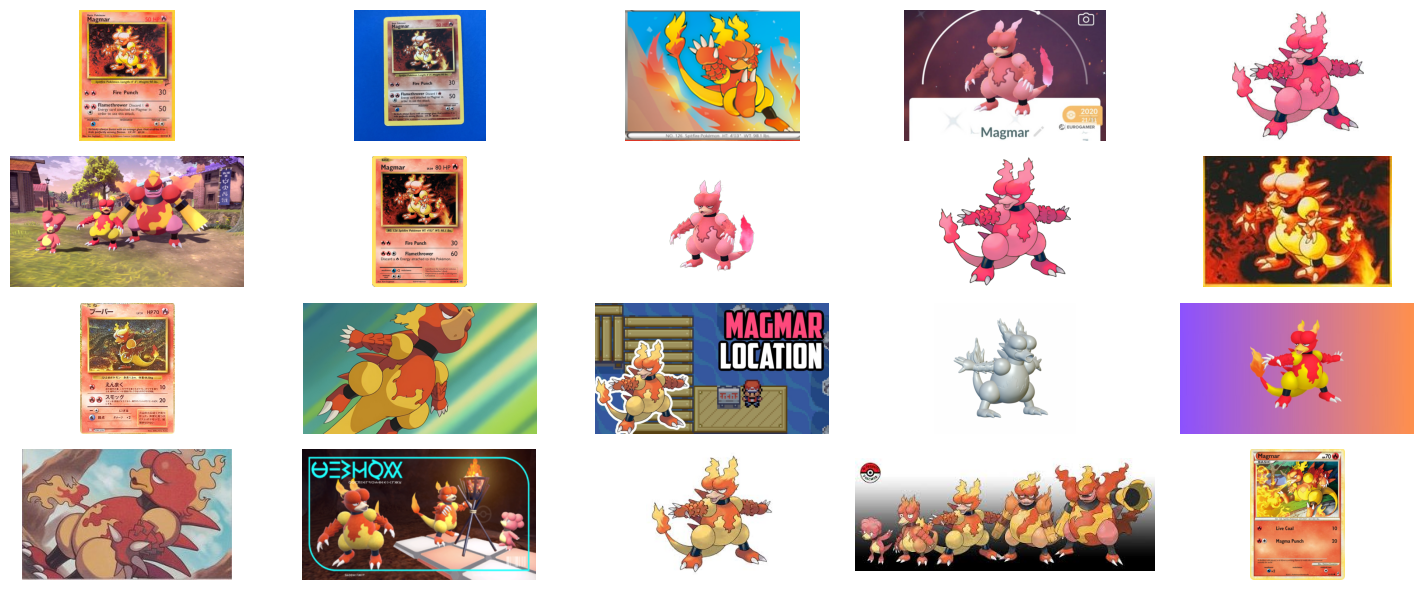

In [10]:
image_dir = "../data/train/magmar - Google Search/"
# List all files in the directory and select 10 random images
image_files = random.sample(os.listdir(image_dir), 20)
# Load and display the images in a 2x5 grid
fig, axes = plt.subplots(4, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    # Open each image file
    img = Image.open(os.path.join(image_dir, image_files[i]))
    ax.imshow(img)
    ax.axis('off')  # Hide axes for clarity
plt.tight_layout()
plt.show()

In [11]:
source_folder = "../data/train/Pikachu - Yahoo Image Search Results/"
destination_folder = "../data/valid/Pikachu - Yahoo Image Search Results/"

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)
# List all images in the source folder
all_images = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# Calculate 20% of the total images
num_images_to_move = int(len(all_images) * 0.2)

# Randomly select images to move
images_to_move = random.sample(all_images, num_images_to_move)

# Move selected images to the destination folder
for image in images_to_move:
    source_path = os.path.join(source_folder, image)
    destination_path = os.path.join(destination_folder, image)
    shutil.move(source_path, destination_path)

print(f'Moved {num_images_to_move} images to the validation folder.')

Moved 24 images to the validation folder.


In [11]:
batch_size=16
train_datagen=ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=True,
rotation_range=40,          # Random rotation between 0 and 40 degrees
brightness_range=[0.8, 1.2], # Random brightness change
channel_shift_range=30.0,    # Randomly change color channels
fill_mode='nearest')          # Fill missing pixels after transformation)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
'../data/train',
target_size=(150,150),
batch_size=batch_size,
class_mode='categorical')

validation_generator=test_datagen.flow_from_directory(
'../data/valid',
target_size=(150,150),
batch_size=batch_size,
class_mode='categorical')

Found 500 images belonging to 4 classes.
Found 126 images belonging to 4 classes.


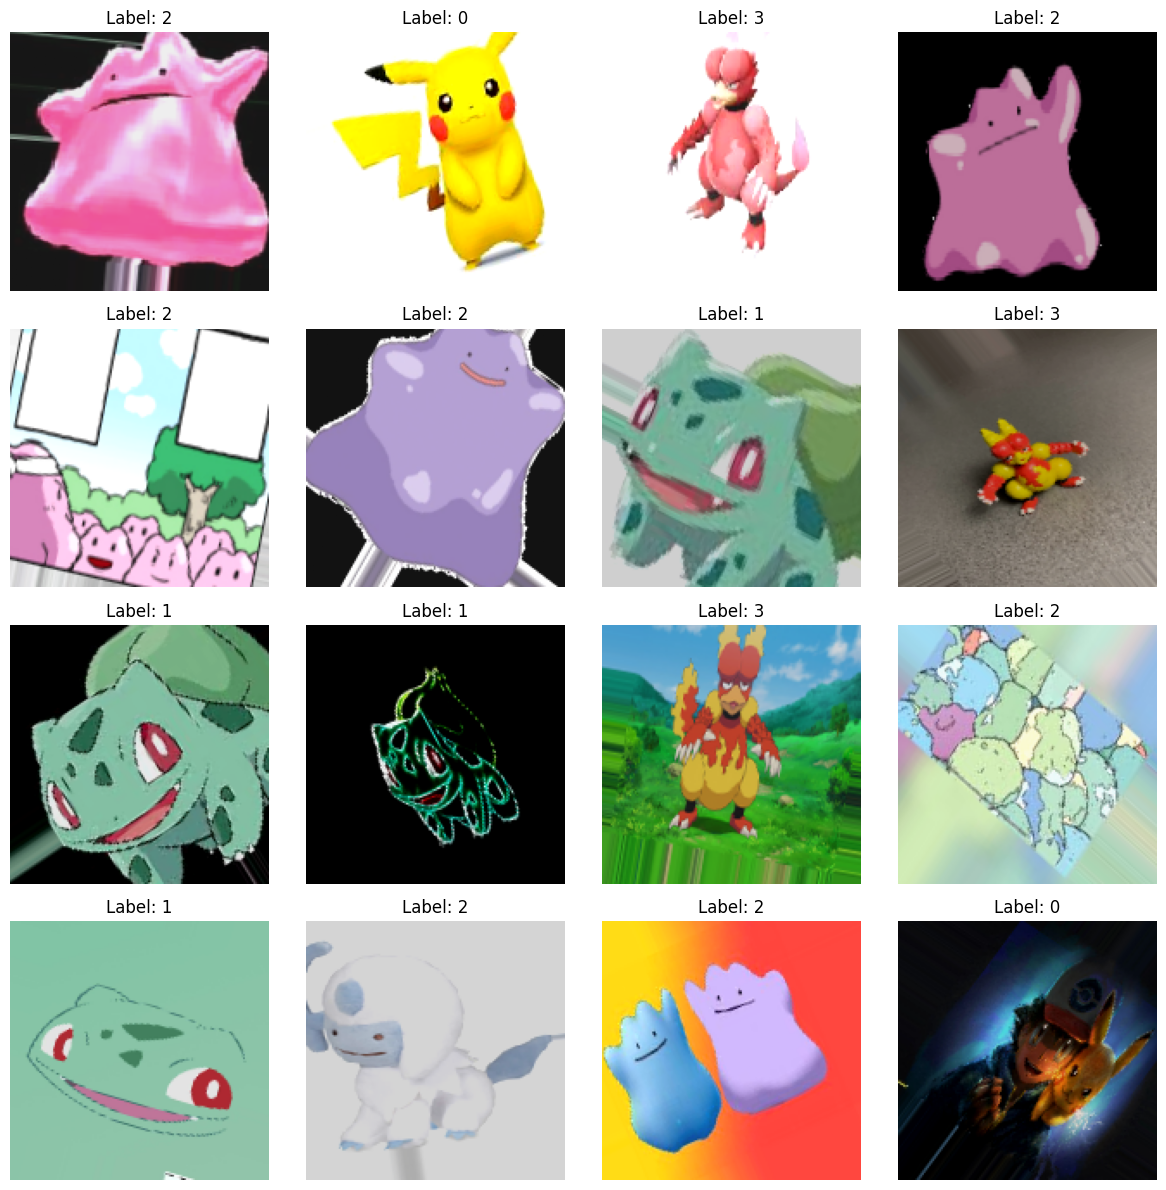

In [12]:
images, labels = next(train_generator)

# Define the number of images to display
num_images = min(len(images), 16)  # Display up to 16 images

# Set up the plot grid
plt.figure(figsize=(12, 12))
for i in range(num_images):
    plt.subplot(4, 4, i + 1)  # Adjust grid size if needed
    plt.imshow(images[i])
    plt.title(f'Label: {labels[i].argmax()}')  # Show the class label
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
model = models.Sequential()
    
# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
    
# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
    
# Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
    
# Flatten the output
model.add(layers.Flatten())
    
# Fully Connected Layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

c:\python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(train_generator,epochs=25,validation_data=validation_generator)

Epoch 1/25


c:\python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 420ms/step - accuracy: 0.4790 - loss: 1.2675 - val_accuracy: 0.6746 - val_loss: 0.7411
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 323ms/step - accuracy: 0.7155 - loss: 0.7131 - val_accuracy: 0.7222 - val_loss: 0.6582
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - accuracy: 0.7724 - loss: 0.5916 - val_accuracy: 0.7778 - val_loss: 0.5994
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 295ms/step - accuracy: 0.8523 - loss: 0.4122 - val_accuracy: 0.8095 - val_loss: 0.5781
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 312ms/step - accuracy: 0.7967 - loss: 0.4868 - val_accuracy: 0.8333 - val_loss: 0.5027
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 317ms/step - accuracy: 0.8175 - loss: 0.4821 - val_accuracy: 0.7698 - val_loss: 0.6585
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 285ms/step - accuracy: 0.8821 - loss: 0.3644 - val_accuracy: 0.8730 - val_loss: 0.4461
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 279ms/step - accuracy: 0.8930 - loss: 0.3292 - val_accuracy: 0.849

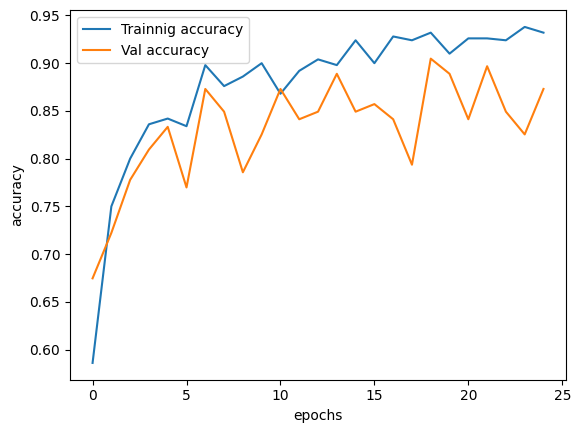

In [40]:
plt.plot(model.history.history['accuracy'],label="Trainnig accuracy")
plt.plot(model.history.history['val_accuracy'],label="Val accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc='upper left')
plt.show()

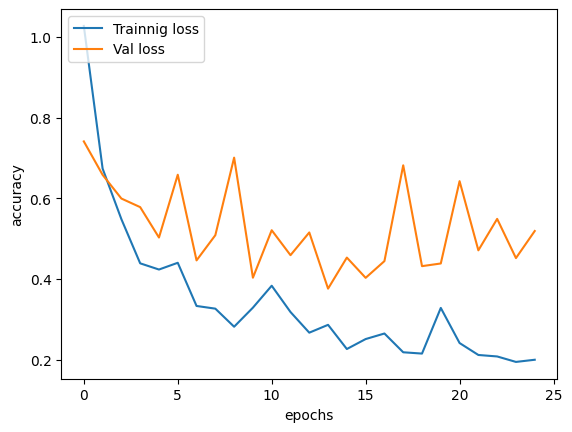

In [41]:
plt.plot(model.history.history['loss'],label="Trainnig loss")
plt.plot(model.history.history['val_loss'],label="Val loss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc='upper left')
plt.show()

In [48]:
img="../data/train/Pikachu - Yahoo Image Search Results/1339746.jpg"
img=cv2.resize(cv2.imread(img),(150,150))
img_normalized=img/255
img_batch=np.expand_dims(img_normalized,axis=0)
prediction=model.predict(img_batch)
final_pred=np.argmax(prediction,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [50]:
model.save("pokemon_recognizer_model.h5")

In [51]:
model.save("pokemon_recognizer_model.keras")

In [1]:
from tensorflow.keras.models import load_model

In [3]:
model=load_model("../model/pokemon_recognizer_model.keras")

c:\python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [14]:
def predict_image(img):
    img=cv2.resize(cv2.imread(img),(150,150))
    img_normalized=img/255
    img_batch=np.expand_dims(img_normalized,axis=0)
    prediction=model.predict(img_batch)
    final_pred=np.argmax(prediction,axis=1)
    if final_pred == 0:
        print("Pikachu")
    elif final_pred ==1:
        print("Bulbasaur")
    elif final_pred ==2:
        print("Ditto")
    else:
        print("Magmar")



In [15]:
img="../Screenshot 2024-11-01 182348.png"
predict_image(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Ditto
